## Контрольная работа 4 Вариант 4

### Задача 1 Численное дифференцирование (1.5 балла)

Вычислить градиент, используя numpy функцию gradient:

- Построить функцию $f(x)=x \cdot e^{-x^2-y^2} \quad$ в области $[-2,2] \times[-2,2]$ с шагом $h_x=0.1 \quad$ и $h_y=0.1$
- Вычислить градиент и изобразить его на том же самом графике (как векторное поле)
- Вычислить погрешность относительно аналитической производной, используя np.linalg.norm.

>__Примечание.__ Векторное поле можно построить по аналогии с этим кодом:

>`x,y = np.meshgrid(np.linspace(-5,5,10),np.linspace(-5,5,10))`
>
>`u = -x/np.sqrt(x\**2 + y\**2)`
>
>`v = y/np.sqrt(x\**2 + y\**2)`
>
>`plt.quiver(x,y,u,v)`
>
>`plt.show()`

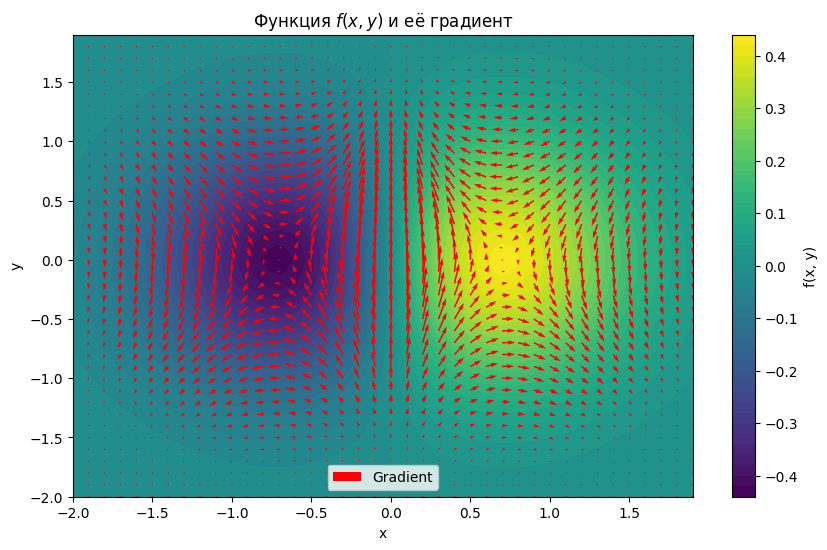

Погрешность по x: 12.487918811556185
Погрешность по y: 12.430617819196481


In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-2, 2, 0.1)
y = np.arange(-2, 2, 0.1)
X, Y = np.meshgrid(x, y)

f = X * np.exp(-X**2 - Y**2)

df_dx, df_dy = np.gradient(f, 0.1, 0.1)

plt.figure(figsize=(10, 6))
plt.contourf(X, Y, f, levels=50, cmap='viridis')
plt.colorbar(label='f(x, y)')
plt.quiver(X, Y, df_dx, df_dy, color='red', label='Gradient')
plt.title('Функция $f(x, y)$ и её градиент')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

df_dx_analytical = np.exp(-X**2 - Y**2) * (1 - 2 * X**2)
df_dy_analytical = -2 * X * Y * np.exp(-X**2 - Y**2)

error_x = np.linalg.norm(df_dx - df_dx_analytical)
error_y = np.linalg.norm(df_dy - df_dy_analytical)

print(f'Погрешность по x: {error_x}')
print(f'Погрешность по y: {error_y}')

### Задача 2  Численное интегрирование (4 балла)

Вычислить интеграл от осциллирующей функции с точностью $10^{-6}$ (Оценивать точность алгоритмом Рунге):

a) $\int_0^1 \frac{\sin 100 x d x}{1+x}$,

б) $\int_1^2 \cos 100 x \ln x d x$.


In [2]:
def integrate(f, array, N):
    x = np.linspace(array[0], array[1], N)  ## Интеграл по методу Симпсона
    integral = 0
    for j in range(0, N-1):
        integral+=(x[j+1]-x[j])*((f(x[j])+f(x[j+1]))/6+f((x[j]+x[j+1])/2)*2/3)
    return integral

In [3]:
def sin_func(x):
    return np.sin(100*x)/(1+x)

def cos_func(x):
    return np.cos(100*x)*np.log(x)

In [4]:
def integrate_precisely(func, array, epsilon):
    integral_h = integrate(func, array, 100)
    integral_h_2 = integrate(func, array, 200)
    delta = integral_h-integral_h_2 ## Выберем р=1

    i=2
    while delta > epsilon or delta<-epsilon:
        integral = integral_h_2
        integral_new = integrate(func, array, 2**i*100)
        delta = (integral_new-integral)
        integral_h_2 = integral_new
        i+=1
    
    return integral_h_2, delta

А)

In [5]:
print('Значение интеграла:', integrate_precisely(sin_func, [0,1], 1e-6)[0], 'Ошибка вычисления:', integrate_precisely(sin_func, [0,1], 1e-6)[1])

Значение интеграла: 0.005699288537656343 Ошибка вычисления: -1.181782279275484e-07


Б)

In [6]:
print('Значение интеграла:', integrate_precisely(cos_func, [1,2], 1e-6)[0], 'Ошибка вычисления:', integrate_precisely(cos_func, [1,2], 1e-6)[1])

Значение интеграла: -0.0061148123701657685 Ошибка вычисления: 1.22804984319623e-07


### Задача 3  Интерполяция (2 балла)

(Т. К. Старожилова) При исследовании некоторой химической реакции через каждые 2 секунды измерялась температура смеси. Результаты измерений представлены в таблице.

| $t, \mathrm{c}$ | 5 | 7 | 9 | 11 | 13 | 15 | 17 | 19 | 21 |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| $T, \mathrm{~K}$ | 296 | 520 | 744 | 982 | 1248 | 1570 | 2256 | 2256 | 2256 |

С помощью сплайн-интерполяции найти $t^*$, при котором производная $d T / d t$ максимальна. Построить график интерполяции и удостовериться, что сплайн "не колеблется".


In [7]:
t = [5, 7, 9, 11, 13, 15, 17, 19, 21]
T = [296, 520, 744, 982, 1248, 1570, 2256, 2256, 2256]

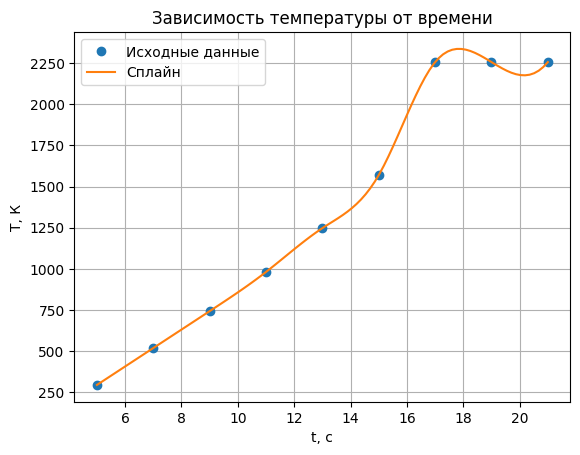

In [8]:
from scipy import interpolate
f1 = interpolate.CubicSpline(t, T)
tnew = np.linspace(5, 21, 100)
plt.plot(t, T,'o', tnew, f1(tnew),'-')
plt.legend(['Исходные данные','Сплайн'])
plt.title('Зависимость температуры от времени')
plt.ylabel('T, К')
plt.xlabel('t, с')
plt.grid(True)
plt.show()

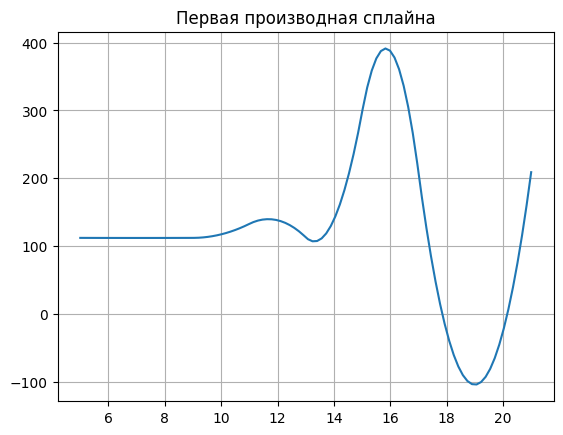

In [9]:
plt.plot(tnew, f1.derivative()(tnew))
plt.title('Первая производная сплайна')
plt.grid(True)
plt.show()

In [10]:
from scipy.optimize import minimize
f2 = f1.derivative()
def negative_der(x):
    return -f2(x)
print('Производная максимальна при:', minimize(negative_der, 16).x[0])

Производная максимальна при: 15.835599981199293


### Задача 4  Ряды (1 балл)

Вычислить сумму ряда

$$
\sum_{n=1}^{\infty} \frac{1}{n(n-1)-3^{-n}}
$$

с точностью $\varepsilon=10^{-6}$. Обоснуйте, почему исходная точность достигнута.

Воспользуемся известной суммой $\sum_{n=1}^\infty \frac{1}{n^2}=\frac{\pi^2}{6}$

$$S = \frac{\pi^2}{6}+\sum_{n=1}^\infty\frac{1}{n(n-1)-\frac{1}{3^n}}-\sum_{n=1}^\infty\frac{1}{n^2}=\frac{\pi^2}{6}+\sum_{n=1}^\infty\frac{1}{n(n-1)-\frac{1}{3^n}}-\frac{1}{n^2}=\frac{\pi^2}{6}+\sum_{n=1}^\infty\frac{n+\frac{1}{3^n}}{n^2(n^2-n-\frac{1}{3^n})}$$

Остается оценить, сколько членов нужно посчитать у последнего ряда, чтобы получить нужную точность

$$\sum_{n=N+1}^\infty\frac{n+\frac{1}{3^n}}{n^2(n^2-n-\frac{1}{3^n})}\leq10^{-6}$$ 
(на бумажке получилось около N = 700 членов)

In [11]:
sum = np.pi**2/6
for k in range (1, 750):
    sum+=(k+1/(3**k))/(k**2*(k**2-k-1/(3**k)))

sum

-1.9694559725715453

Проверим, что там дают оставшиеся члены

In [12]:
err = 0
for k in range (750, 10000):
    err+=(k+1/(3**k))/(k**2*(k**2-k-1/(3**k)))

err

8.858665289514304e-07

В целом, то, что надо

### Задача 5  Дискретное преобразование Фурье (1.5 балла)

Построить графики дискретного преобразования Фурье для

$$
x(k)=\left\{\begin{array}{c}
\cos \left(\frac{2 \pi}{N} k\right) + \mathcal{N}(\sigma, 0), \quad 0 \leq k \leq N-1, \\
0, \quad \text { при других } k .
\end{array}\right.
$$

при $N=128$ и $\sigma$ в промежутке от 0 до 0.5. Как изменяется картина спектра?

$\mathcal{N}(\sigma, 0)$ - гауссов шум с дисперсией $\sigma^2$.


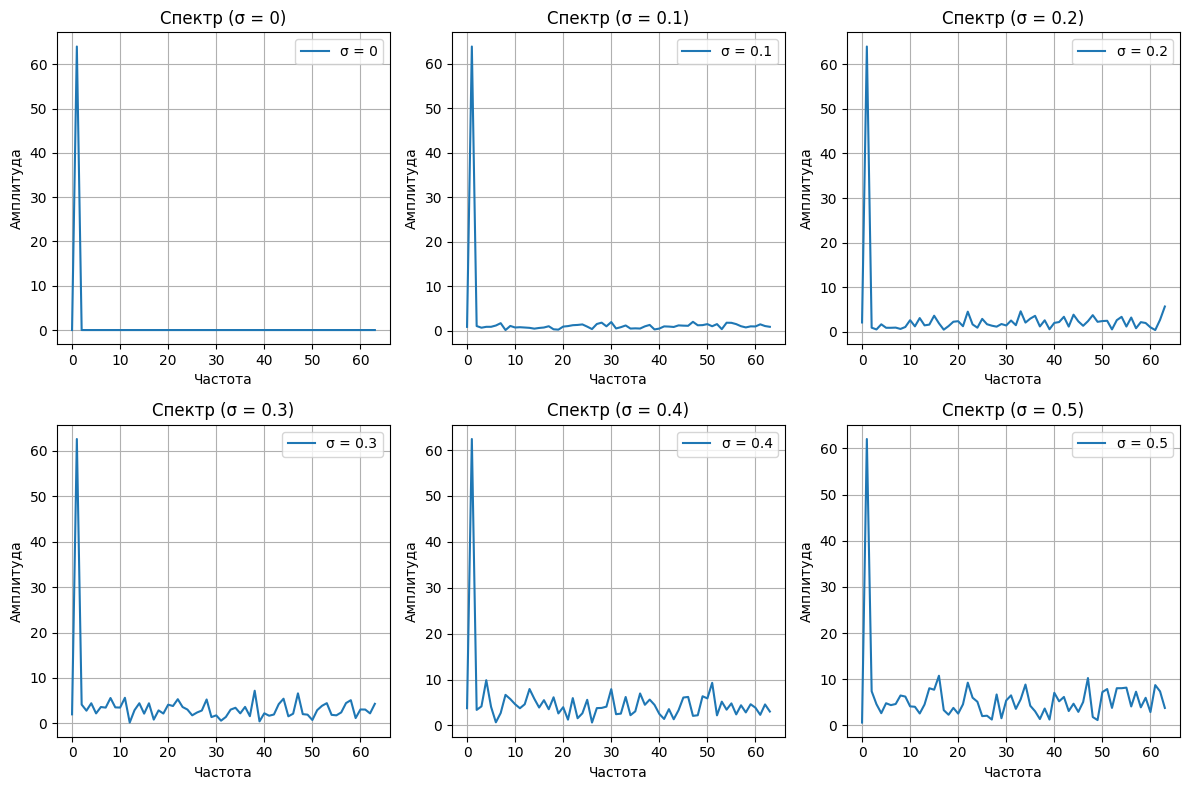

In [13]:
N = 128 
k = np.arange(N)  

def generate_signal(sigma):
    signal = np.cos(2 * np.pi / N * k) + np.random.normal(0, sigma, N)
    return signal

def compute_spectrum(signal):
    spectrum = np.fft.fft(signal)  
    amplitude_spectrum = np.abs(spectrum) 
    return amplitude_spectrum

sigma_values = [0, 0.1, 0.2, 0.3, 0.4, 0.5]

plt.figure(figsize=(12, 8))

for i, sigma in enumerate(sigma_values):
  
    signal = generate_signal(sigma)
    amplitude_spectrum = compute_spectrum(signal)
    
    plt.subplot(2, 3, i + 1)
    plt.plot(amplitude_spectrum[:N // 2], label=f'σ = {sigma}')
    plt.title(f'Спектр (σ = {sigma})')
    plt.xlabel('Частота')
    plt.ylabel('Амплитуда')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()